**About Dataset**

**Description:**
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

Acknowledgements:
This dataset has been referred from Kaggle.
link : https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset



**Problem Statement:** Breast Cancer Classification using **Support Vector Machine (SVM)**

Breast cancer is one of the most common and life-threatening diseases affecting women worldwide. Early diagnosis significantly improves the chances of successful treatment and recovery. However, manual diagnosis based on biopsy or imaging can be time-consuming and subject to human error.

This project aims to develop a binary classification model using Support Vector Machine (SVM) to automatically distinguish between malignant and benign breast tumors using the Breast Cancer Wisconsin dataset. The goal is to create a reliable, efficient, and accurate model that can assist healthcare professionals in decision-making.

**Objectives:**

Load and preprocess the Breast Cancer dataset to make it suitable for binary classification.

Train SVM classifiers using both linear and RBF kernels.

Visualize the decision boundaries using 2D projection of the data.

Tune hyperparameters like C and gamma using GridSearchCV for better performance.

Evaluate model performance using cross-validation, confusion matrix, and classification report

# Importing require Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

# import the Breast Cancer Dataset

In [2]:
breast_dataset = pd.read_csv("breast-cancer.csv")

In [3]:
print("Top 10 rows :\n")
breast_dataset.head(10)

Top 10 rows :



id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   
5  ...         15.47          23.75           103.40       741.6   
6  ...         22.88          27.66           153.20      1606.0   
7  ...         17.06          28.14           110.60       897.0   
8  ...         15.49          30.73           106.20       739.3   
9  ...         15.09          40.68            97.65       711.4   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  
5          0.3985                  0.12440  
6          0.3063                  0.08368  
7          0.3196                  0.11510  
8          0.4378                  0.10720  
9          0.4366                  0.20750  

[10 rows x 32 columns]

In [4]:
Total_Rows = breast_dataset.shape[0]
Total_Cols = breast_dataset.shape[1]
print("Total Rows is :",Total_Rows)
print("Total columns is :", Total_Cols)

Total Rows is : 569
Total columns is : 32


In [5]:
print( "\n Information about the Titanic dataset : \n " )
breast_dataset.info()


 Information about the Titanic dataset : 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-nu

# Columns distribution

In [6]:
feature_cols =  breast_dataset.columns.tolist()
print("Total columns is here :\n", breast_dataset.columns.tolist())

Total columns is here :
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
numerical_col = breast_dataset.select_dtypes(include=["int64","float64"]).columns
print("Total Numerical columns list is here :\n", numerical_col)
print("\nTotal Numerical columns is here :\n" ,numerical_col.value_counts().sum())

Total Numerical columns list is here :
 Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Total Numerical columns is here :
 31


In [8]:
categorical_col = breast_dataset.select_dtypes(include=["O"]).columns
print("Total categorical columns  list is here :\n", categorical_col)
print("\nTotal categorical columns is here :\n" ,categorical_col.value_counts().sum())

Total categorical columns  list is here :
 Index(['diagnosis'], dtype='object')

Total categorical columns is here :
 1


# basic statistics about the Iris data :

In [9]:
breast_dataset.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [10]:
breast_dataset.describe(include="all").T

count unique  top freq             mean  \
id                       569.0    NaN  NaN  NaN  30371831.432337   
diagnosis                  569      2    B  357              NaN   
radius_mean              569.0    NaN  NaN  NaN        14.127292   
texture_mean             569.0    NaN  NaN  NaN        19.289649   
perimeter_mean           569.0    NaN  NaN  NaN        91.969033   
area_mean                569.0    NaN  NaN  NaN       654.889104   
smoothness_mean          569.0    NaN  NaN  NaN          0.09636   
compactness_mean         569.0    NaN  NaN  NaN         0.104341   
concavity_mean           569.0    NaN  NaN  NaN         0.088799   
concave points_mean      569.0    NaN  NaN  NaN         0.048919   
symmetry_mean            569.0    NaN  NaN  NaN         0.181162   
fractal_dimension_mean   569.0    NaN  NaN  NaN         0.062798   
radius_se                569.0    NaN  NaN  NaN         0.405172   
texture_se               569.0    NaN  NaN  NaN         1.216853   
perimeter_se             569.0    NaN  NaN  NaN         2.866059   
area_se                  569.0    NaN  NaN  NaN        40.337079   
smoothness_se            569.0    NaN  NaN  NaN         0.007041   
compactness_se           569.0    NaN  NaN  NaN         0.025478   
concavity_se             569.0    NaN  NaN  NaN         0.031894   
concave points_se        569.0    NaN  NaN  NaN         0.011796   
symmetry_se              569.0    NaN  NaN  NaN         0.020542   
fractal_dimension_se     569.0    NaN  NaN  NaN         0.003795   
radius_worst             569.0    NaN  NaN  NaN         16.26919   
texture_worst            569.0    NaN  NaN  NaN        25.677223   
perimeter_worst          569.0    NaN  NaN  NaN       107.261213   
area_worst               569.0    NaN  NaN  NaN       880.583128   
smoothness_worst         569.0    NaN  NaN  NaN         0.132369   
compactness_worst        569.0    NaN  NaN  NaN         0.254265   
concavity_worst          569.0    NaN  NaN  NaN         0.272188   
concave points_worst     569.0    NaN  NaN  NaN         0.114606   
symmetry_worst           569.0    NaN  NaN  NaN         0.290076   
fractal_dimension_worst  569.0    NaN  NaN  NaN         0.083946   

                                      std       min       25%       50%  \
id                       125020585.612224    8670.0  869218.0  906024.0   
diagnosis                             NaN       NaN       NaN       NaN   
radius_mean                      3.524049     6.981      11.7     13.37   
texture_mean                     4.301036      9.71     16.17     18.84   
perimeter_mean                  24.298981     43.79     75.17     86.24   
area_mean                      351.914129     143.5     420.3     551.1   
smoothness_mean                  0.014064   0.05263   0.08637   0.09587   
compactness_mean                 0.052813   0.01938   0.06492   0.09263   
concavity_mean                    0.07972       0.0   0.02956   0.06154   
concave points_mean              0.038803       0.0   0.02031    0.0335   
symmetry_mean                    0.027414     0.106    0.1619    0.1792   
fractal_dimension_mean            0.00706   0.04996    0.0577   0.06154   
radius_se                        0.277313    0.1115    0.2324    0.3242   
texture_se                       0.551648    0.3602    0.8339     1.108   
perimeter_se                     2.021855     0.757     1.606     2.287   
area_se                         45.491006     6.802     17.85     24.53   
smoothness_se                    0.003003  0.001713  0.005169   0.00638   
compactness_se                   0.017908  0.002252   0.01308   0.02045   
concavity_se                     0.030186       0.0   0.01509   0.02589   
concave points_se                 0.00617       0.0  0.007638   0.01093   
symmetry_se                      0.008266  0.007882   0.01516   0.01873   
fractal_dimension_se             0.002646  0.000895  0.002248  0.003187   
radius_worst                     4.833242      7.93    

In [11]:
breast_dataset.describe(include="O").T

count unique top freq
diagnosis   569      2   B  357

# Visualizations:

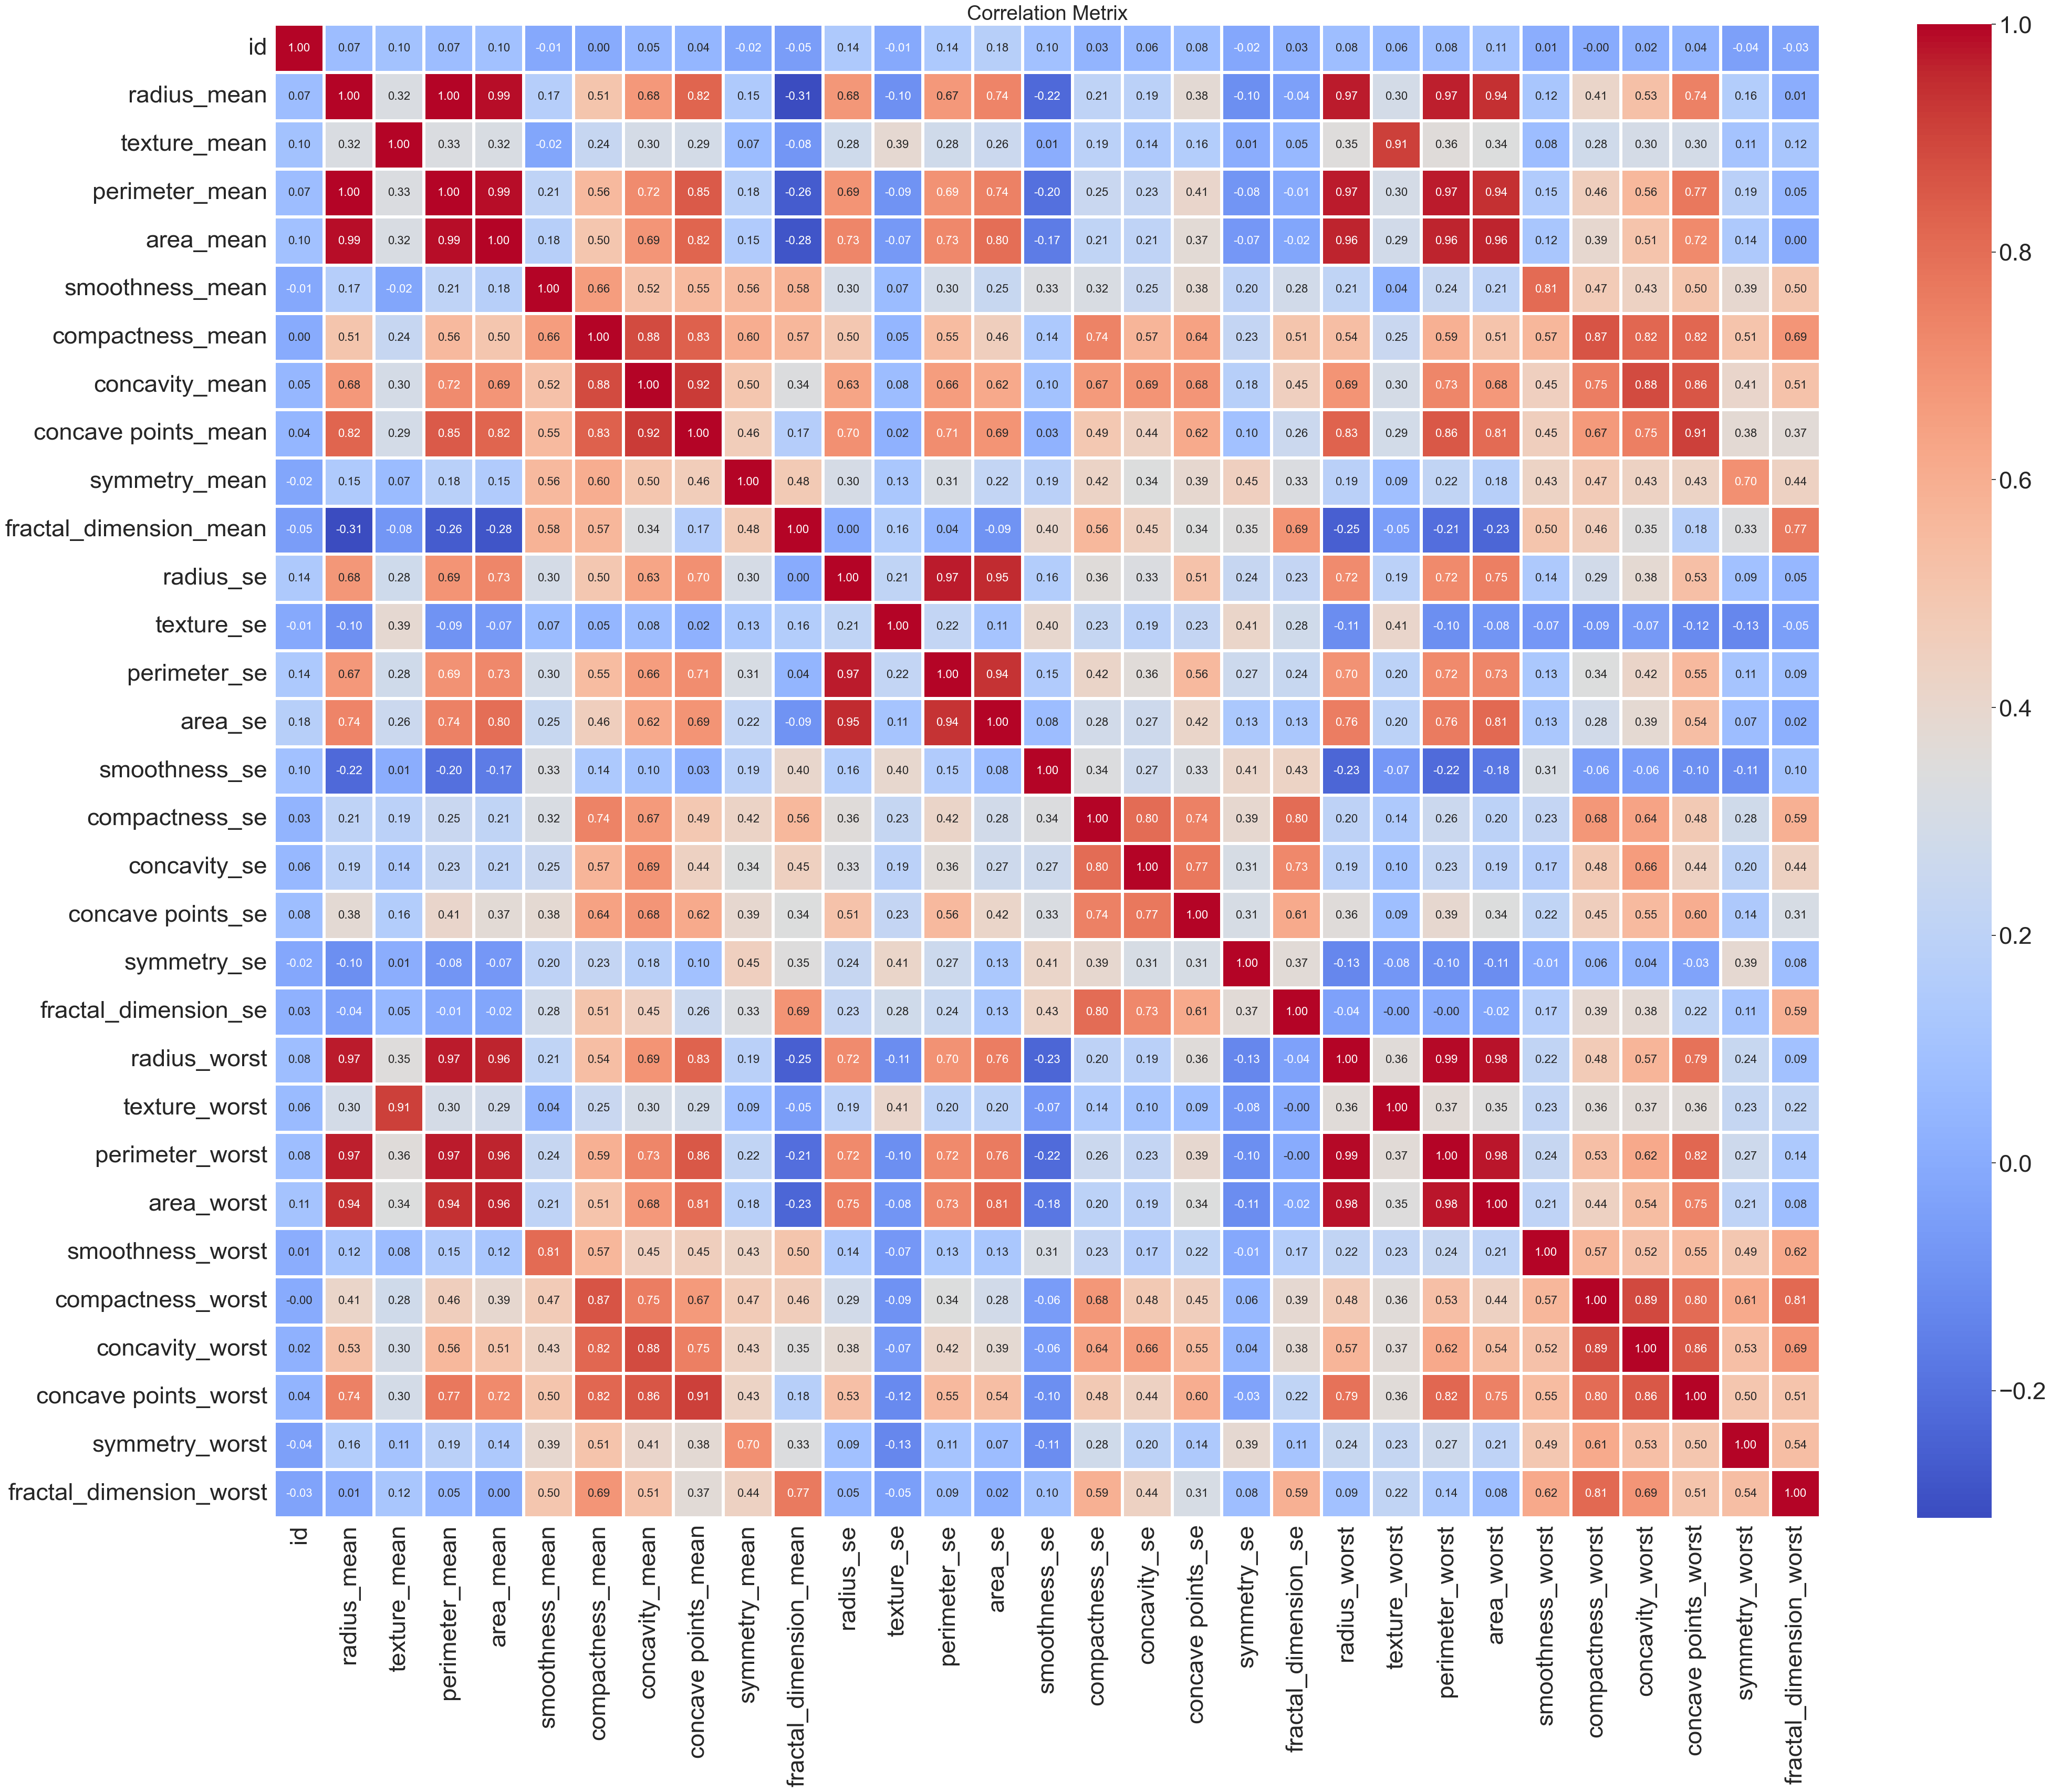

In [12]:
correlation = breast_dataset.corr(numeric_only=True)

plt.figure(figsize=(43,35))
sns.set(font_scale=3.0)
sns.heatmap(correlation ,linewidths="4" ,annot=True ,cmap="coolwarm",       
            annot_kws={"size": 16}, fmt=".2f",)
plt.title("Correlation Metrix" , fontsize=28)
plt.tight_layout()
plt.show()

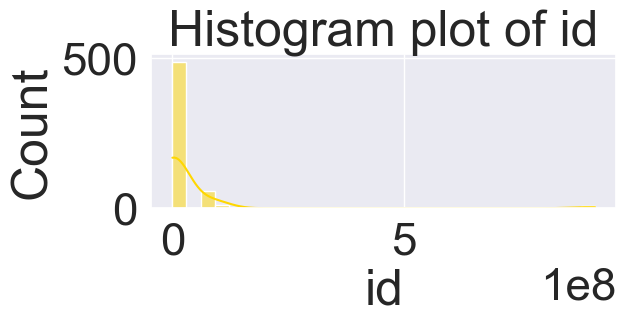

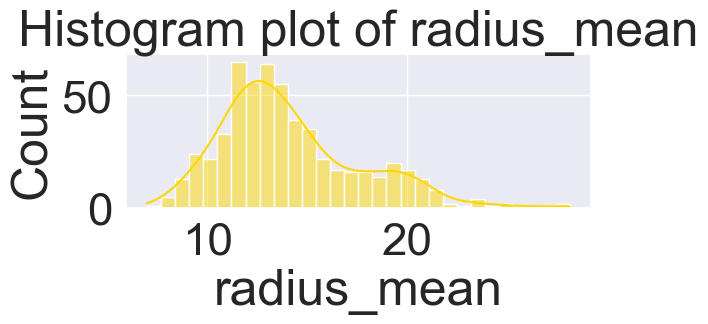

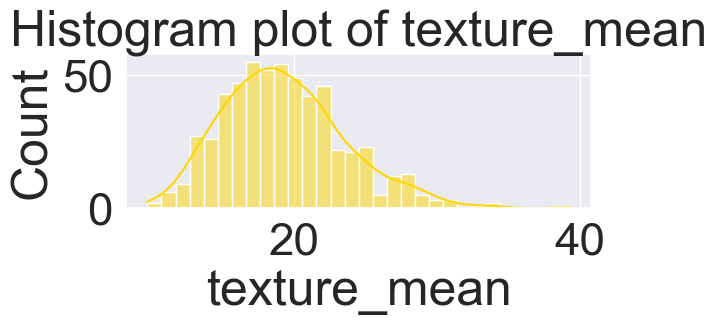

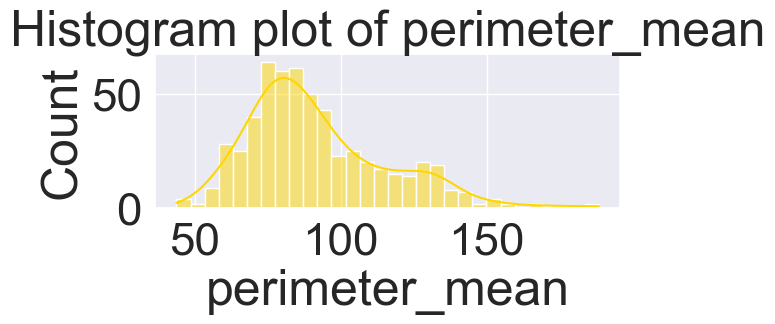

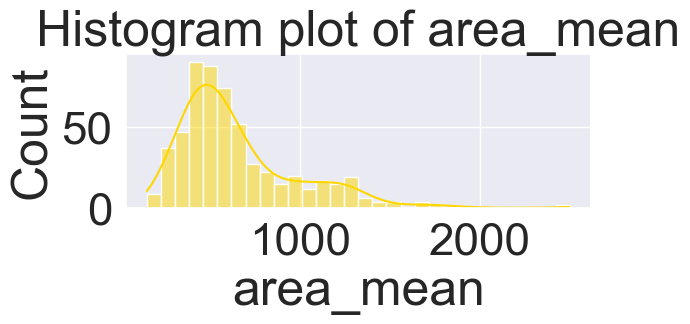

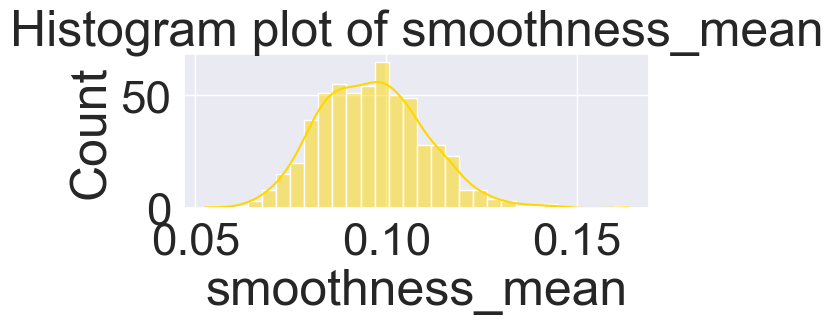

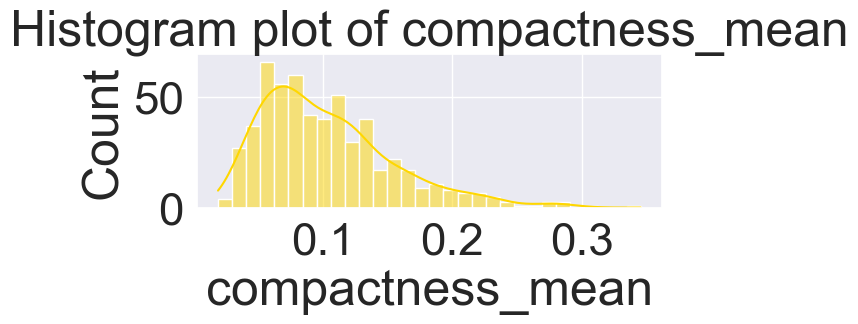

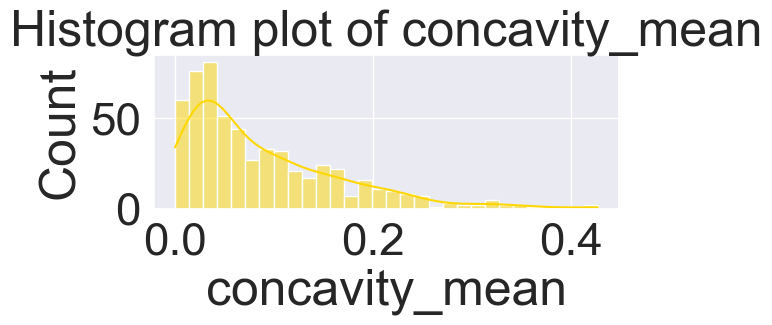

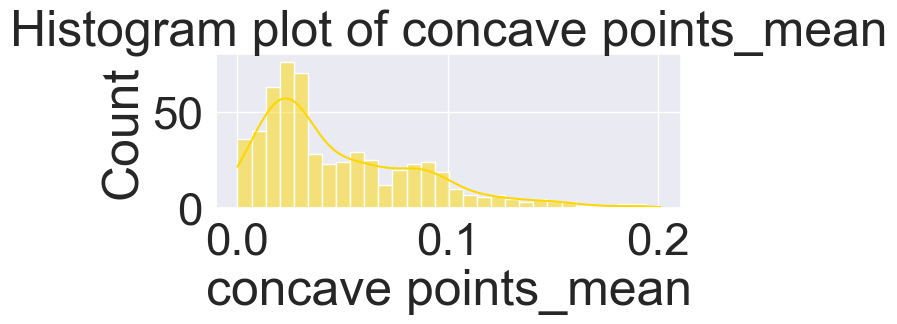

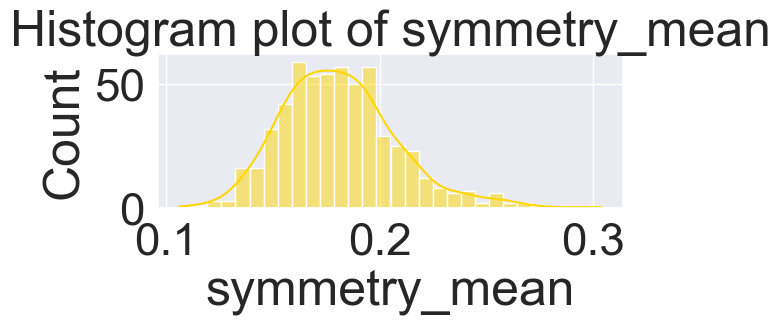

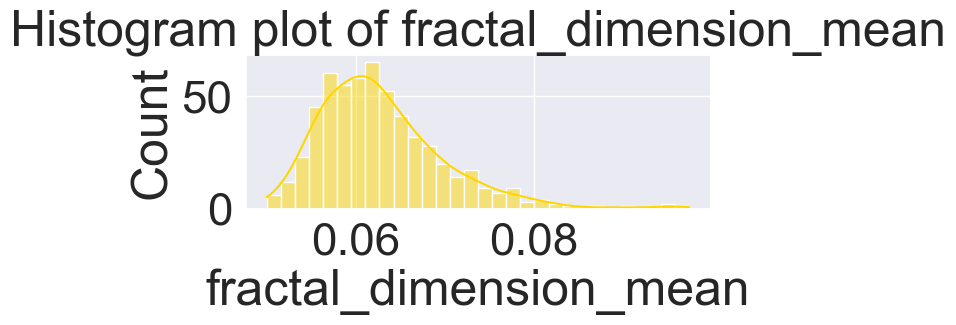

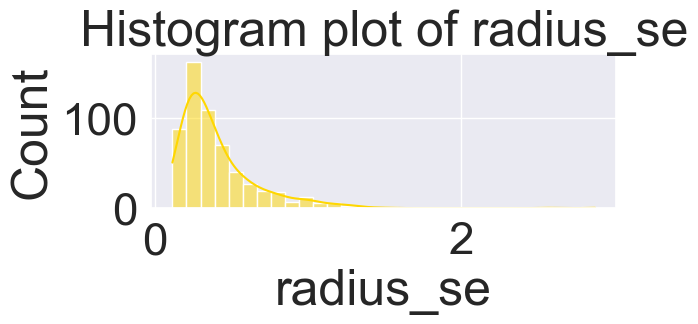

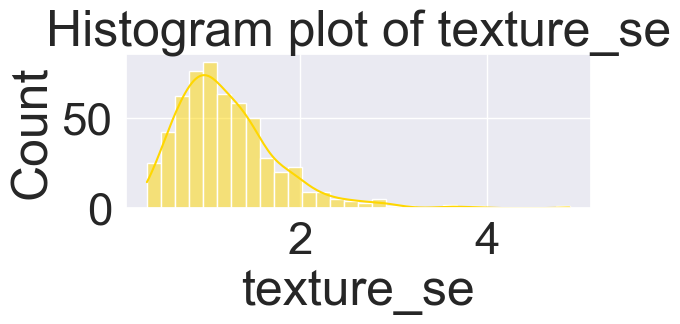

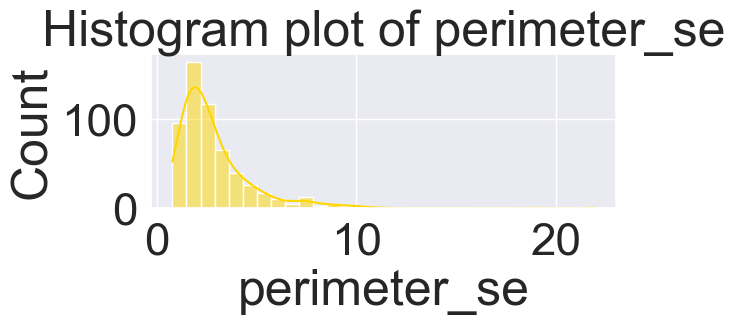

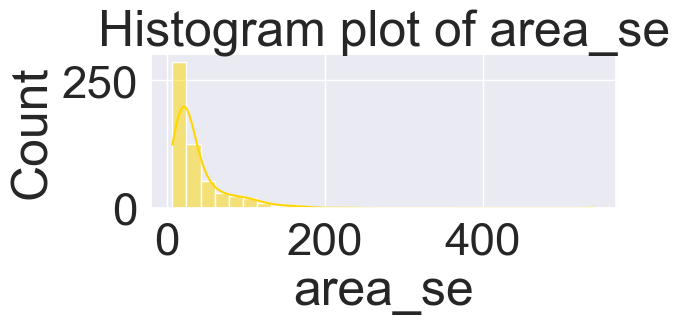

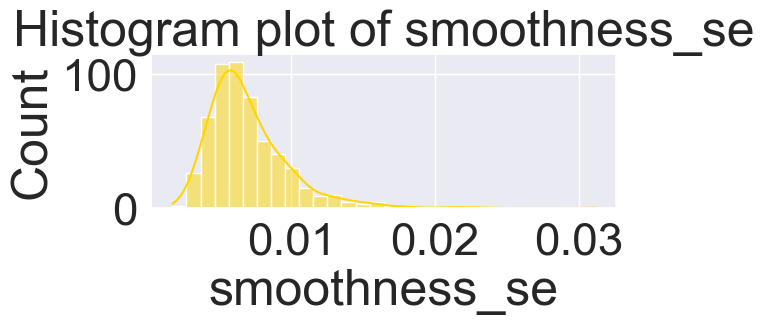

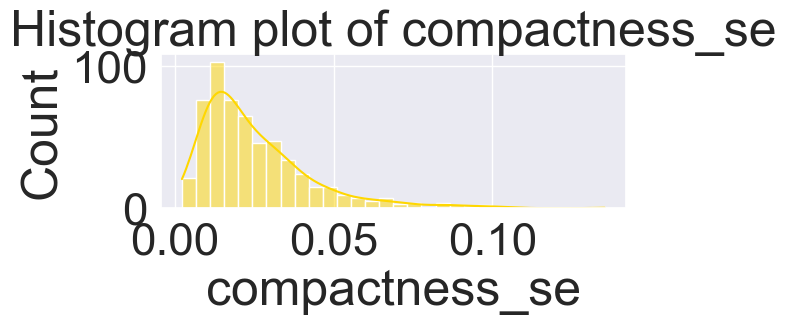

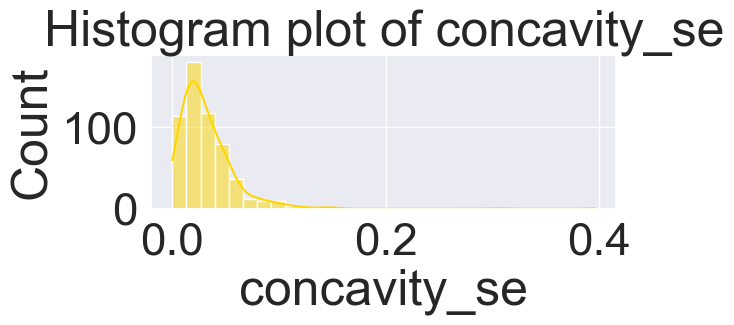

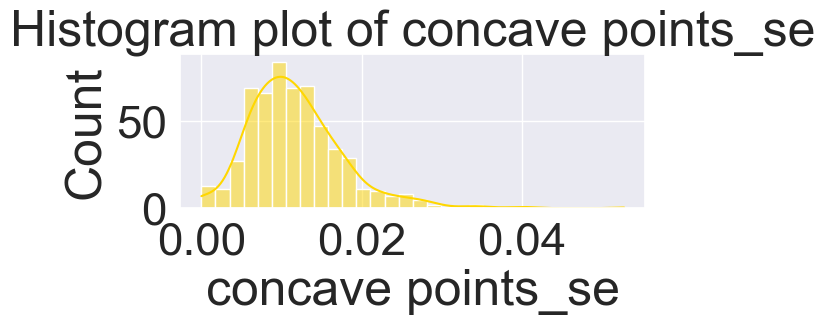

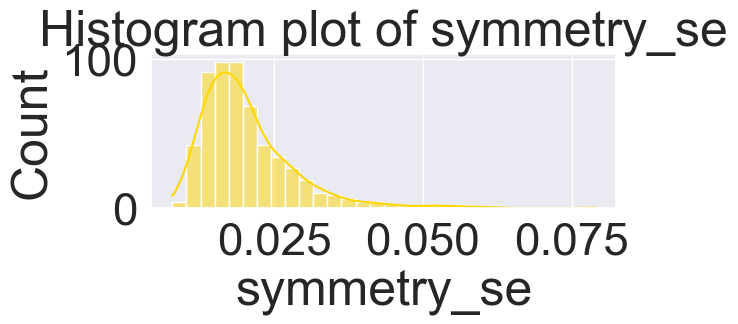

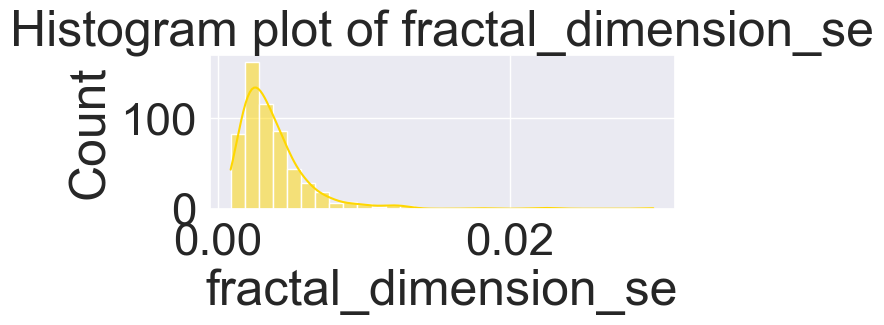

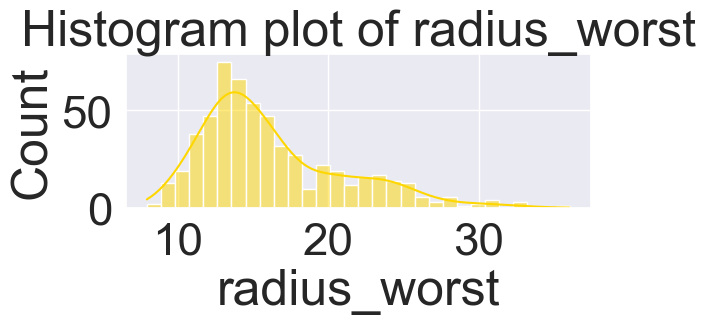

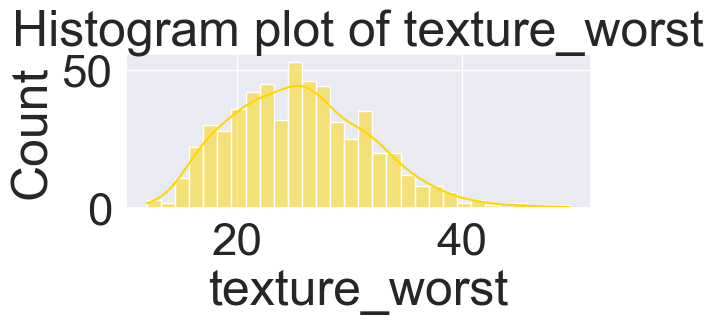

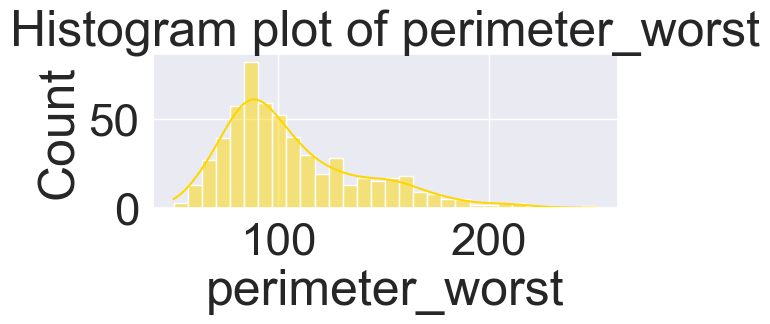

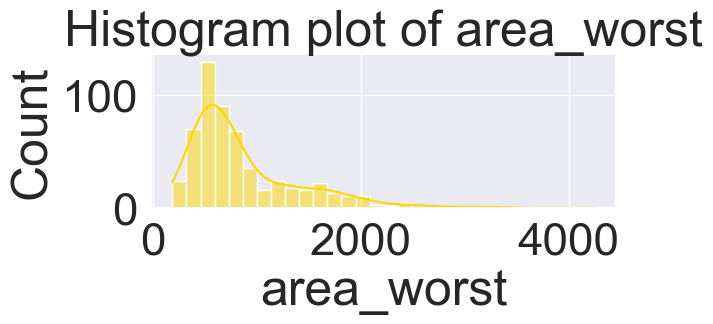

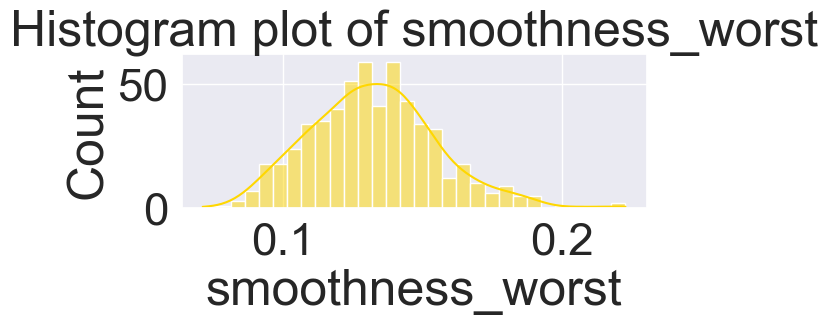

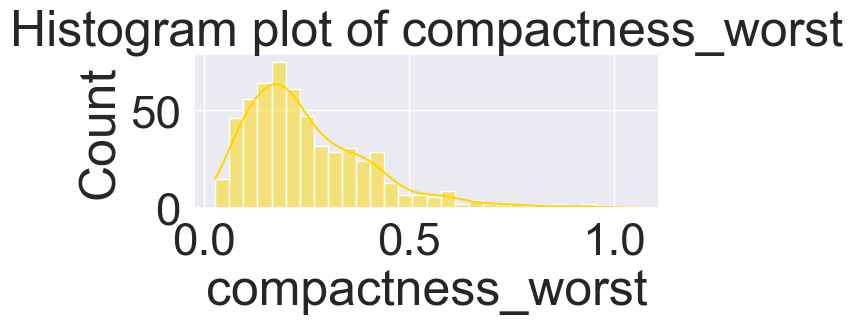

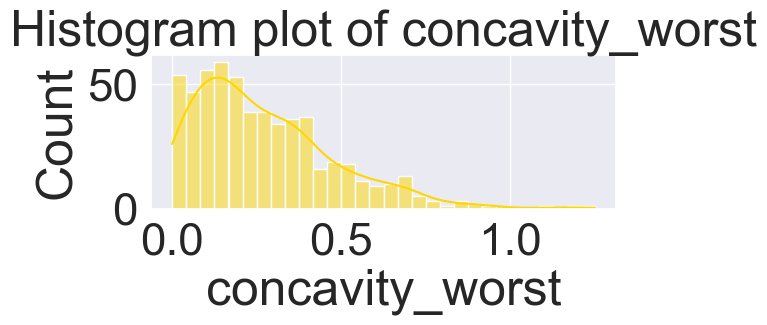

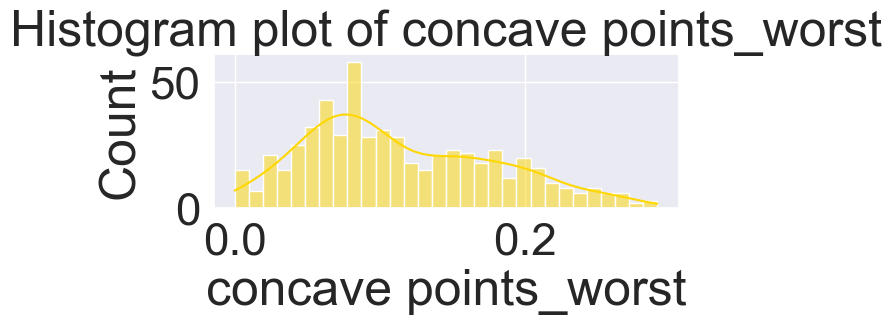

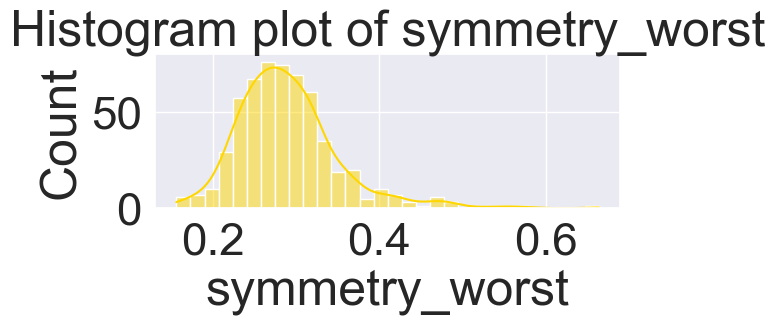

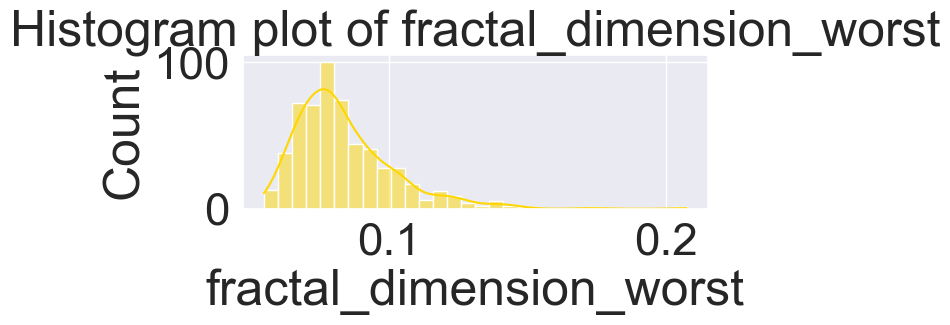

In [13]:
for col in numerical_col:
    plt.figure(figsize=(6,2))
    sns.histplot(x=breast_dataset[col],color="gold",kde=True ,bins=30)
    plt.title(f"Histogram plot of {col}")
    plt.show()

# Preprocessing :

# 1. Handle null values:

In [14]:
breast_dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

its clearly watching you not missing value in dataset

# 2. Handle category values :

In [15]:
lb = LabelEncoder()
lb
breast_dataset.diagnosis= lb.fit_transform(breast_dataset.diagnosis)

In [16]:
breast_dataset.diagnosis[15:30]

15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: diagnosis, dtype: int32

# 3. detect Outlines and Remove

In [17]:
for i in breast_dataset:
    q1 = breast_dataset[i].quantile(0.25)
    q3 = breast_dataset[i].quantile(0.75)
    
    iqr = q3-q1 
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    breast_dataset = breast_dataset[(breast_dataset[i] >= lower_bound) & ( breast_dataset[i] <= upper_bound)]
    

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


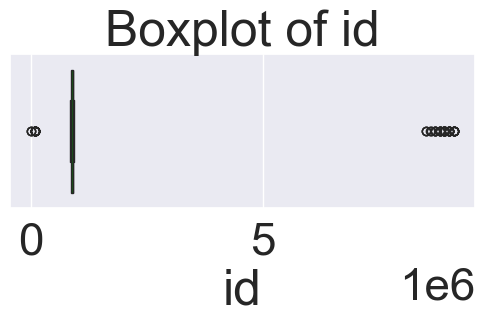

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


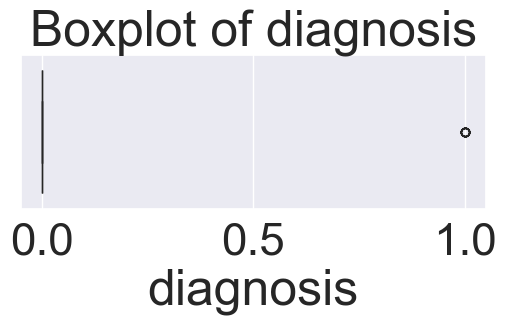

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


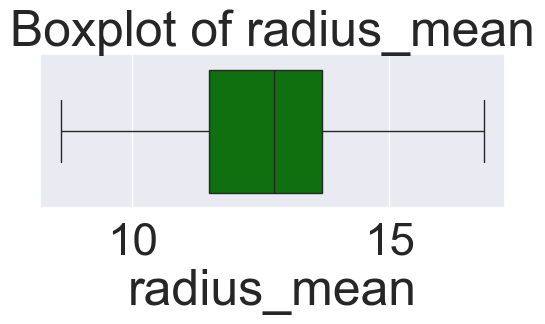

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


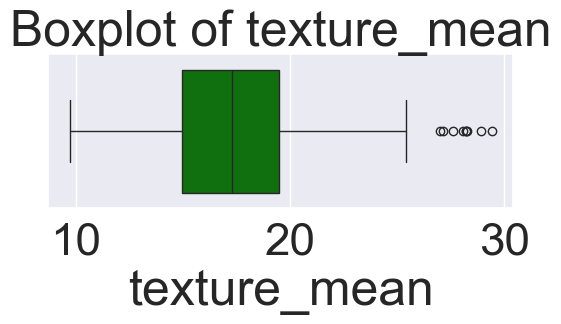

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


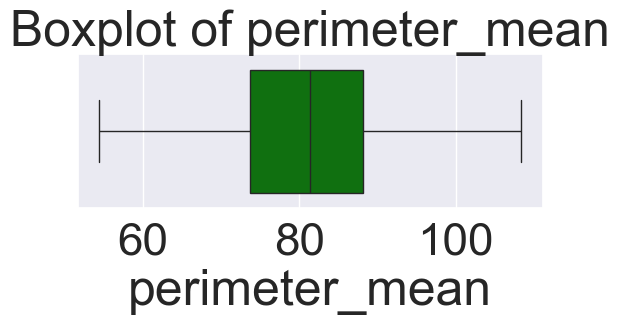

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


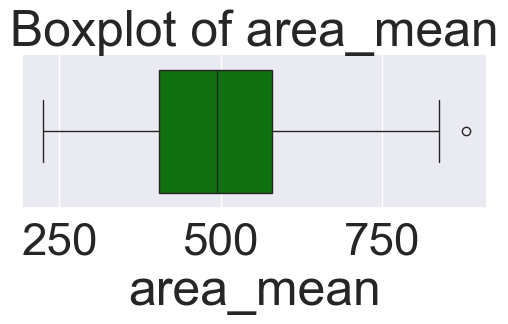

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


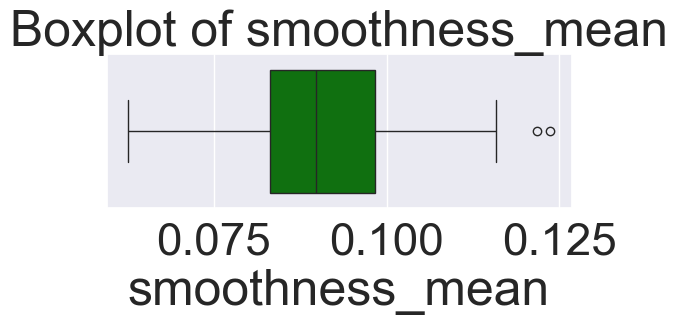

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


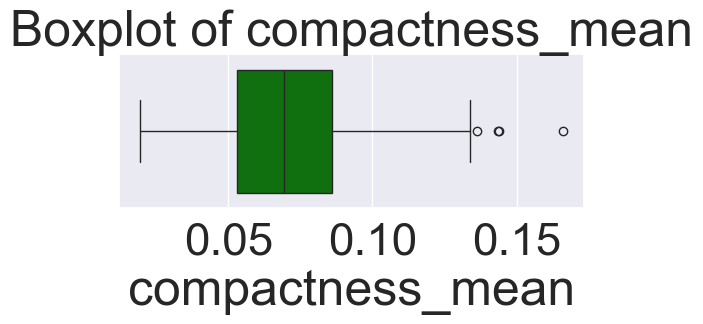

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


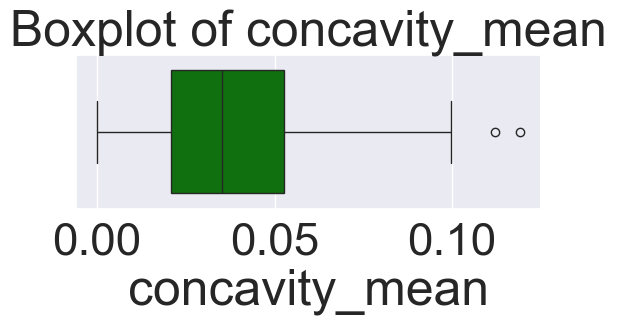

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


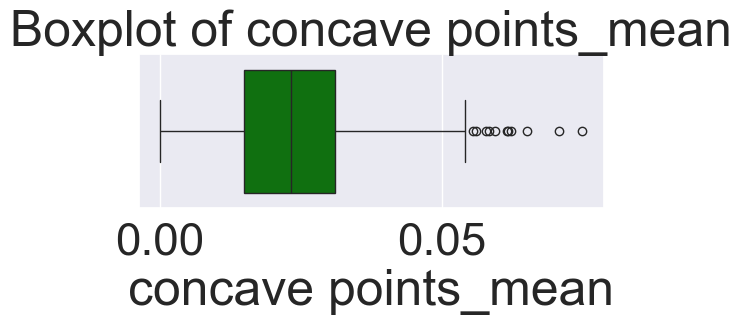

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


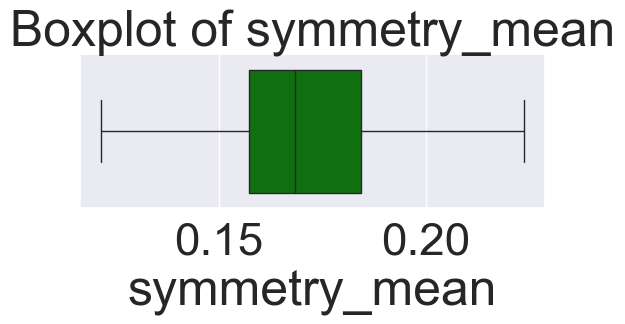

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


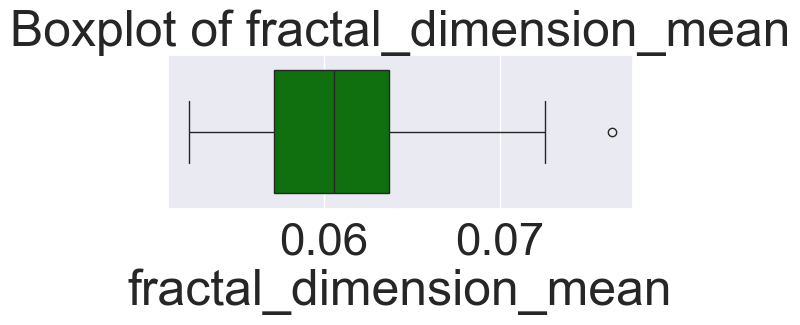

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


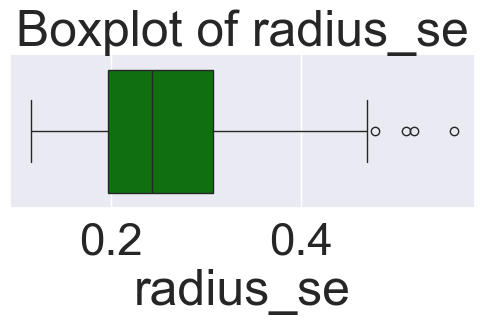

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


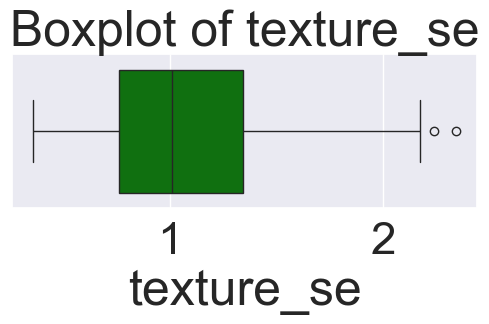

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


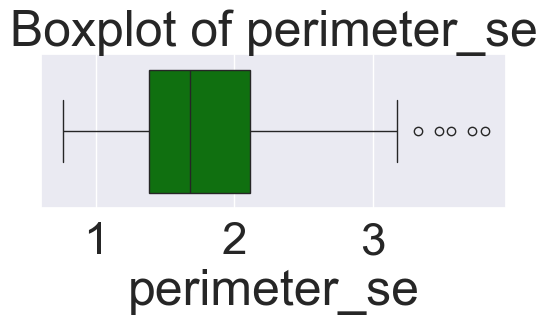

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


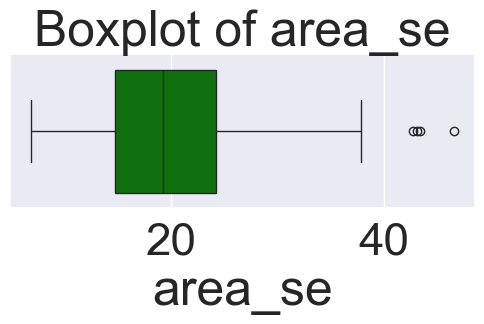

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


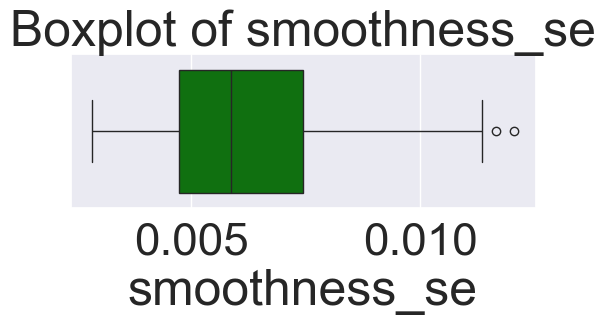

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


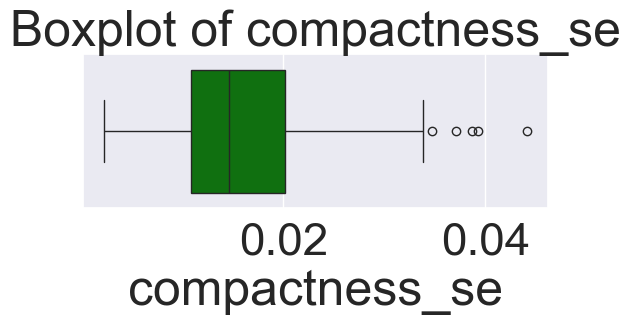

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


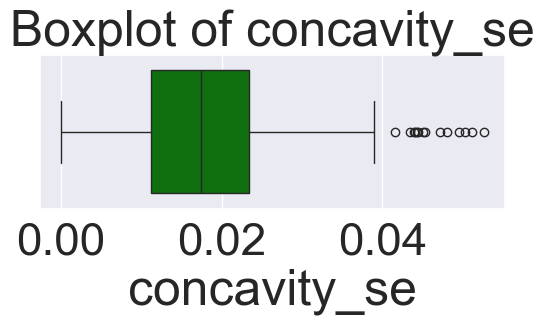

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


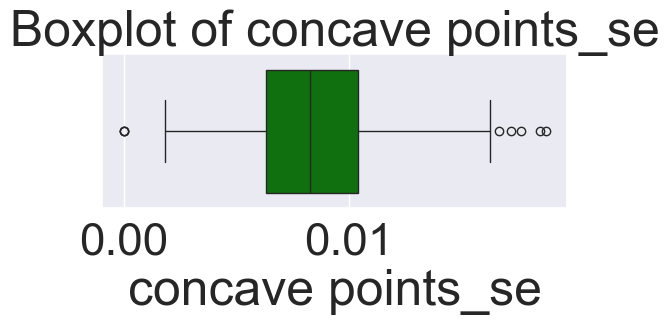

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


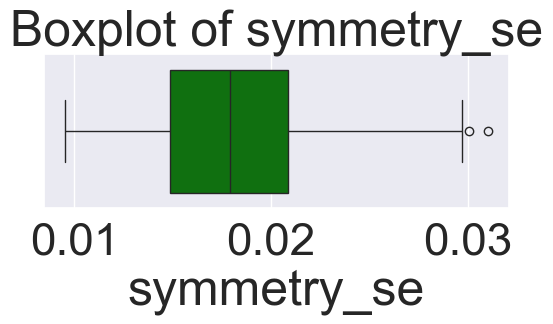

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


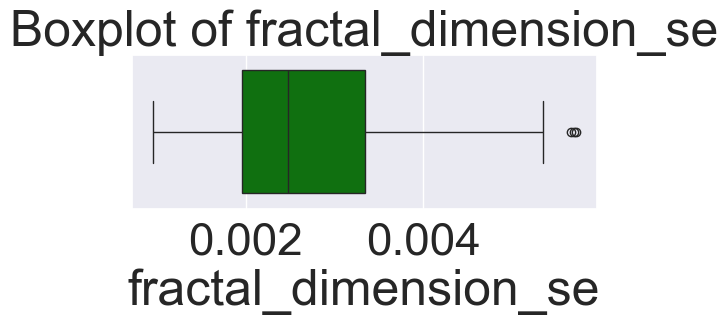

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


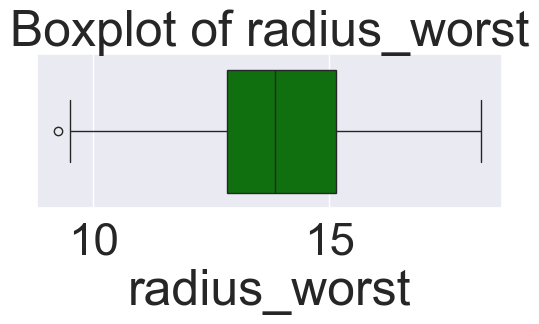

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


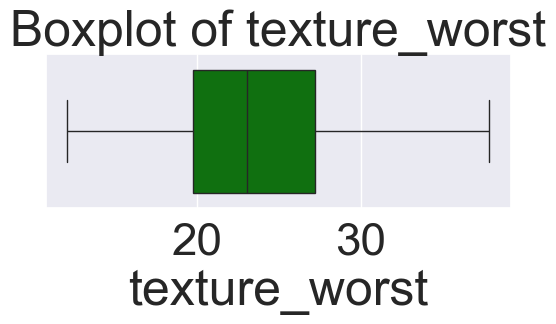

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


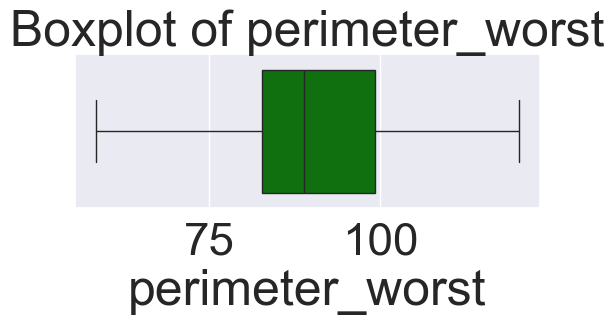

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


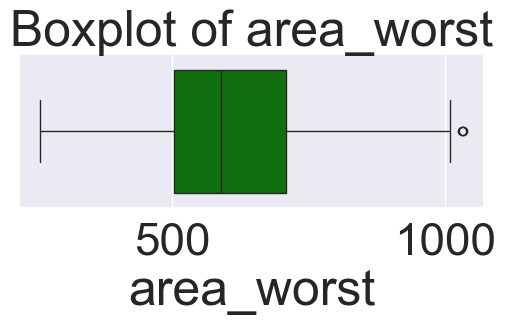

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


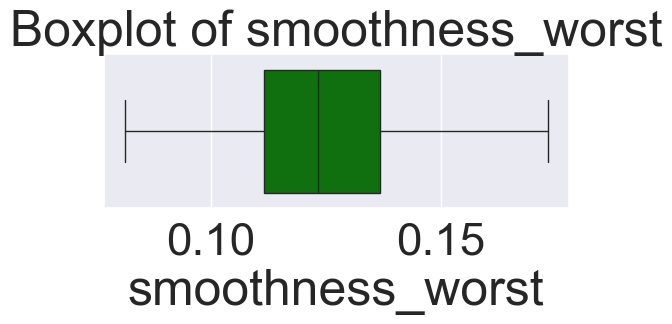

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


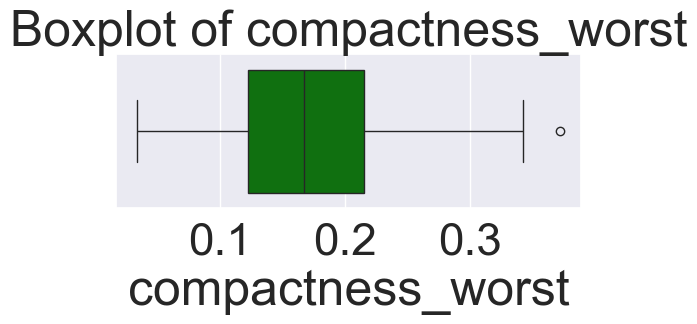

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


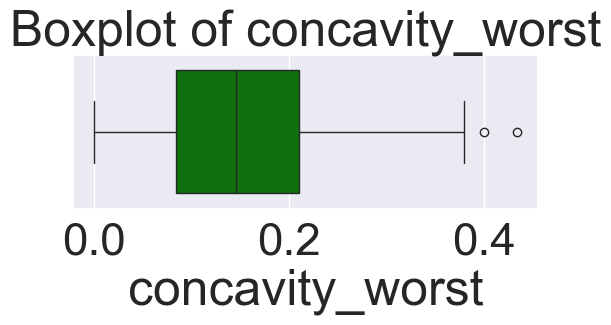

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


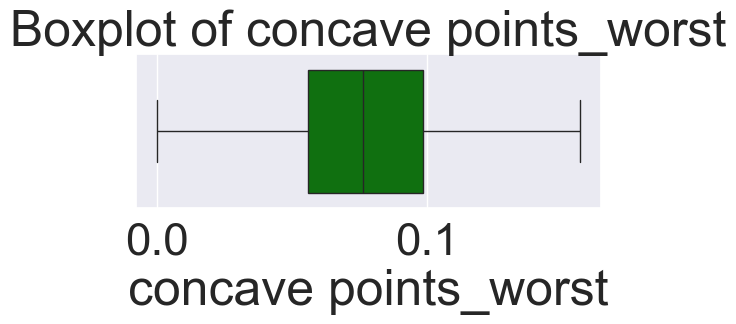

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


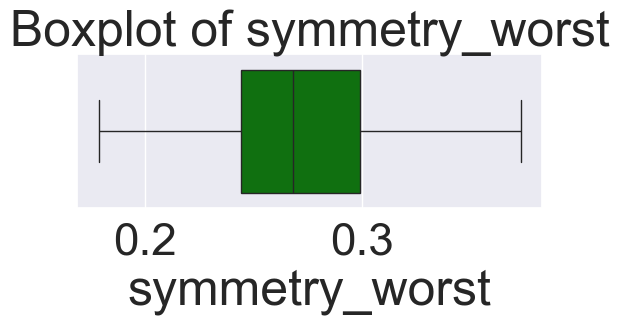

C:\Users\baps\AppData\Local\Temp\ipykernel_1380\1625187679.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


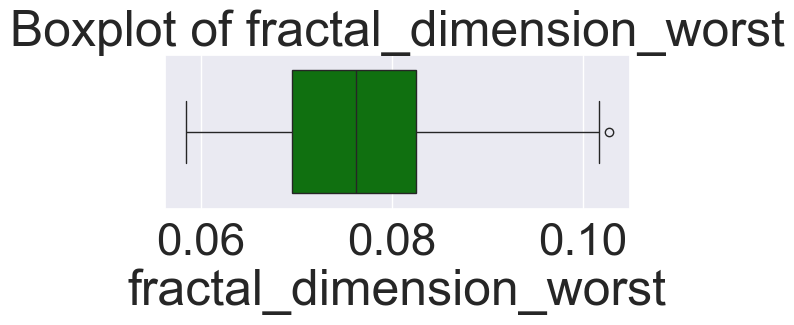

In [18]:
for col in breast_dataset:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=breast_dataset[col], color="green")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

import warnings 
warnings.simplefilter("ignore")

# Feature Engineering:

In [19]:
x = breast_dataset.drop("diagnosis",axis=1)
y = breast_dataset.diagnosis

x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.2 , random_state=42)


In [20]:
y.value_counts()

diagnosis
0    219
1     14
Name: count, dtype: int64

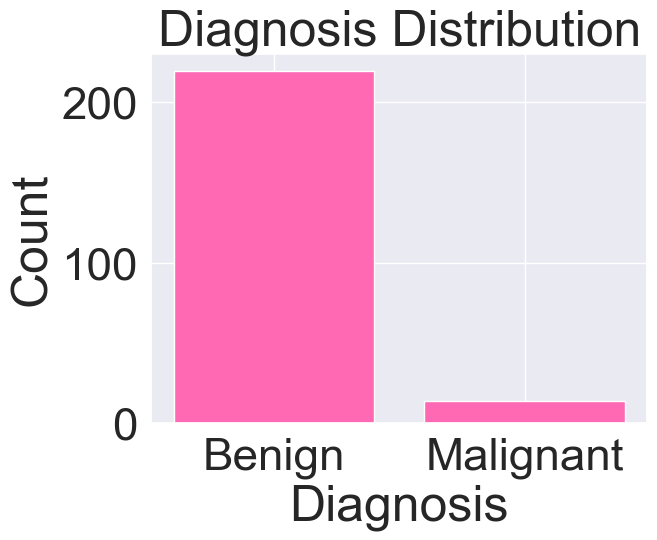

In [21]:
target_var = y.map({0: "Benign", 1: "Malignant"}).value_counts()

plt.bar(target_var.index, target_var.values, color="hotpink")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Diagnosis Distribution")
plt.show()








# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

 # Visualize decision boundary using 2D PCA

In [23]:
# Step 2: PCA on full scaled data
pca = PCA(n_components=2)
X_2d = pca.fit_transform(x_scaled)

In [28]:
# Step 3: Now split PCA data and labels together

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

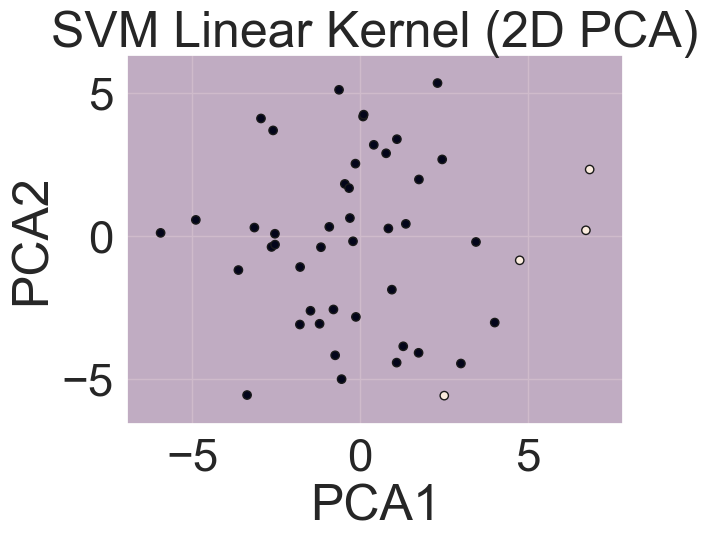

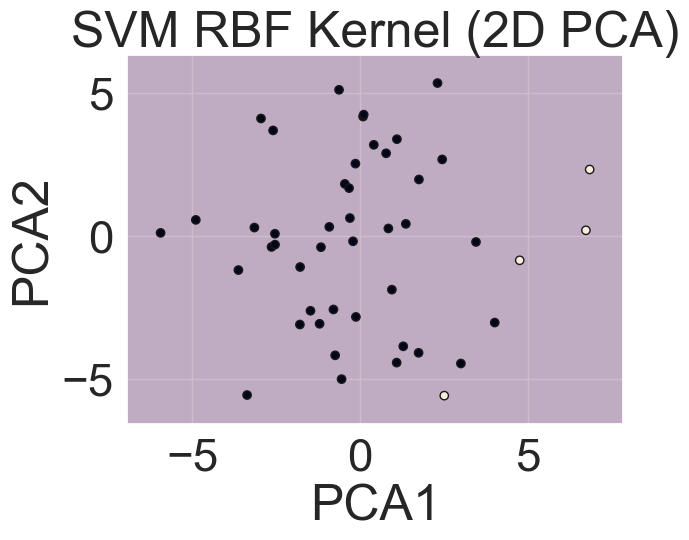

In [29]:
# Step 4: Train SVMs on 2D data

svm_linear_2d = SVC(kernel="linear", C=1).fit(X_train_2d, y_train_2d)
svm_rbf_2d = SVC(kernel="rbf", gamma="scale", C=1).fit(X_train_2d, y_train_2d)

# Step 5: Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.title(title)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()


plot_decision_boundary(svm_linear_2d, X_test_2d, y_test_2d, "SVM Linear Kernel (2D PCA)")
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test_2d, "SVM RBF Kernel (2D PCA)")


# evaluation:

In [31]:

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.001, 0.01, 0.1]
}

# Create GridSearchCV
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.01}


In [32]:
y_pred = grid.predict(x_test)

In [33]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9148936170212766


Confusion Matrix:
 [[43  0]
 [ 4  0]]


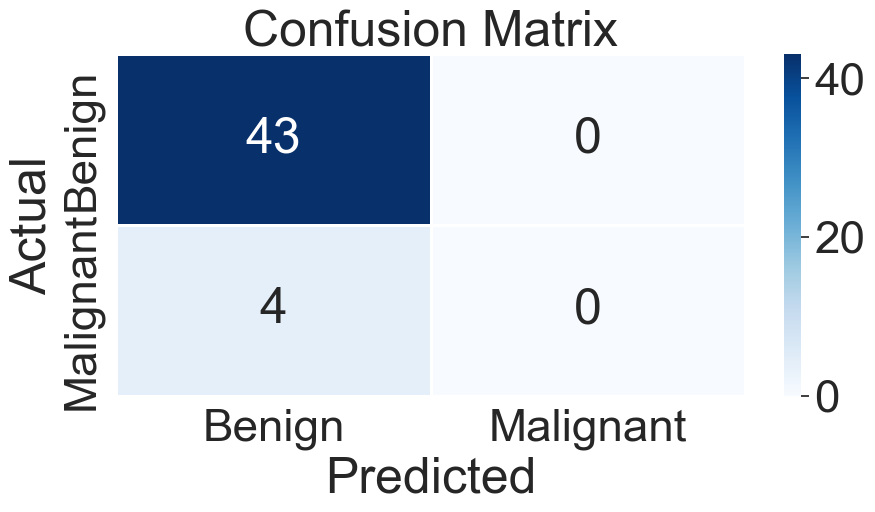

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm )

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, linewidths=2, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [35]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       0.00      0.00      0.00         4

    accuracy                           0.91        47
   macro avg       0.46      0.50      0.48        47
weighted avg       0.84      0.91      0.87        47



In [36]:


cv_scores = cross_val_score(grid.best_estimator_, x_scaled, y, cv=5)
print("Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores.mean(), cv_scores.std()))


Cross-Validation Accuracy: 0.97 ± 0.02


In [37]:

breast_dataset

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19   8510426          0       13.540         14.36           87.46      566.3   
20   8510653          0       13.080         15.71           85.63      520.0   
21   8510824          0        9.504         12.44           60.34      273.9   
37    854941          0       13.030         18.42           82.61      523.8   
40    855167          1       13.440         21.58           86.18      563.0   
..       ...        ...          ...           ...             ...        ...   
551   923780          0       11.130         22.44           71.49      378.4   
552   924084          0       12.770         29.43           81.35      507.9   
554   924632          0       12.880         28.92           82.50      514.3   
555   924934          0       10.290         27.61           65.67      321.4   
560   925292          0       14.050         27.15           91.38      600.4   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
19           0.09779           0.08129         0.06664              0.04781   
20           0.10750           0.12700         0.04568              0.03110   
21           0.10240           0.06492         0.02956              0.02076   
37           0.08983           0.03766         0.02562              0.02923   
40           0.08162           0.06031         0.03110              0.02031   
..               ...               ...             ...                  ...   
551          0.09566           0.08194         0.04824              0.02257   
552          0.08276           0.04234         0.01997              0.01499   
554          0.08123           0.05824         0.06195              0.02343   
555          0.09030           0.07658         0.05999              0.02738   
560          0.09929           0.11260         0.04462              0.04304   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
19   ...         15.11          19.26            99.70       711.2   
20   ...         14.50          20.49            96.09       630.5   
21   ...         10.23          15.66            65.13       314.9   
37   ...         13.30          22.81            84.46       545.9   
40   ...         15.93          30.25           102.50       787.9   
..   ...           ...            ...              ...         ...   
551  ...         12.02          28.26            77.80       436.6   
552  ...         13.87          36.00            88.10       594.7   
554  ...         13.89          35.74            88.84       595.7   
555  ...         10.84          34.91            69.57       357.6   
560  ...         15.30          33.17           100.20       706.7   

     smoothness_worst  compactness_worst  concavity_worst  \
19            0.14400            0.17730          0.23900   
20            0.13120            0.27760          0.18900   
21            0.13240            0.11480          0.08867   
37            0.09701            0.04619          0.04833   
40            0.10940            0.20430          0.20850   
..                ...                ...              ...   
551           0.10870            0.17820          0.15640   
552           0.12340            0.10640          0.08653   
554           0.12270            0.16200          0.24390   
555           0.13840            0.17100          0.20000   
560           0.12410            0.22640          0.13260   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
19                0.12880          0.2977                  0.07259  
20                0.07283          0.3184                  0.08183  
21                0.06227          0.2450                  0.07773  
37                0.05013          0.1987                  0.06169  
40                0.11120          0.2994                  0.07146  
..                    ...             ...                      ...  
551               0.06413      

In [38]:
new_data_scaled = [14.5, 20.5, 95.5, 600, 0.1, 0.2, 0.3, 0.1, 0.2, 0.07, 
                   0.3, 1.2, 2.0, 25.0, 0.01, 0.04, 0.05, 0.02, 0.02, 0.01,
                   16.0, 30.0, 120.0, 900, 0.14, 0.4, 0.5, 0.2, 0.3, 0.08]

new_data_scaled.append(0)

new_data_scaled_reshaped = [new_data_scaled]

new_prediction = grid.best_estimator_.predict(new_data_scaled_reshaped)
print(new_prediction)


[0]


 **Conclusion**
 
In this analysis, we built a Support Vector Machine (SVM) model to classify breast cancer tumors as malignant or benign using the Breast Cancer Wisconsin dataset. The dataset was standardized and visualized using PCA, enabling us to plot decision boundaries for both linear and RBF kernels in two dimensions.

We then performed hyperparameter tuning using GridSearchCV to find the optimal values of C and gamma. The final model achieved a high test accuracy and showed strong performance across cross-validation folds.

**Key Takeaways:**

PCA helped visualize class separability in 2D.

RBF kernel SVM with tuned parameters outperformed the linear model.

The model achieved excellent classification performance, making it suitable for early detection tasks in healthcare.